In [18]:
import os
import torch as t
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import DataLoader
from Project2_LSTM.load_data import AudioTrainDataset, PaddingZeros, CustomSpectogram, TargetEncoder
from torchvision.transforms import Compose


In [9]:
DATA_PATH = os.path.join("tensorflow-speech-recognition-challenge", "train", "audio")
dataset = AudioTrainDataset(DATA_PATH)

labels_list, labels_dict = dataset.find_classes(DATA_PATH)
labels_dict = {idx: name for name, idx in labels_dict.items()}
NUM_WORKERS = 6
BATCH_SIZE = 512

transforms = Compose([
    PaddingZeros(16000),
    CustomSpectogram(n_fft=1024, power=2),
])

features_dataset = AudioTrainDataset(DATA_PATH, transform=transforms,
                                     target_transform=TargetEncoder(class_dict=labels_dict))
gen = t.Generator().manual_seed(42)
train_dataset, valid_dataset, test_dataset = t.utils.data.random_split(features_dataset, [0.7, 0.1, 0.2],
                                                                           generator=gen)
len(train_dataset), len(valid_dataset), len(test_dataset)
train_dataset_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True,
                                  generator=t.random.manual_seed(123))
valid_dataset_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
test_dataset_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
y = []
for x, y_batch in test_dataset_loader:
    y += [y_batch]
y = t.cat(y)
y.shape

E:\Studies\DataScience-1sem\DeepLearning\venv\lib\site-packages\torch\utils\data\dataloader.py:554: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [48]:
t.save(y, "y_test_one_hot_labels.ts")

In [35]:
y_hat = t.load("spectogram_cnn_lstm_predictions.ts")

In [36]:
y_hat

tensor([[[4.0640e-07, 3.6488e-07, 5.6595e-07,  ..., 9.8567e-07,
          9.9999e-01, 6.1464e-07],
         [4.0534e-07, 3.6391e-07, 5.6482e-07,  ..., 9.8367e-07,
          9.9999e-01, 6.1353e-07],
         [4.0560e-07, 3.6428e-07, 5.6559e-07,  ..., 9.8482e-07,
          9.9999e-01, 6.1398e-07],
         ...,
         [3.9615e-07, 3.5632e-07, 5.5099e-07,  ..., 9.6626e-07,
          9.9999e-01, 5.9804e-07],
         [4.0641e-07, 3.6489e-07, 5.6597e-07,  ..., 9.8569e-07,
          9.9999e-01, 6.1466e-07],
         [4.0770e-07, 3.6603e-07, 5.6799e-07,  ..., 9.8888e-07,
          9.9999e-01, 6.1658e-07]],

        [[1.0520e-06, 2.5233e-06, 1.3914e-06,  ..., 1.3159e-06,
          9.9998e-01, 1.8942e-06],
         [1.0602e-06, 2.5203e-06, 1.4041e-06,  ..., 1.3237e-06,
          9.9998e-01, 1.9030e-06],
         [1.2223e-06, 2.8752e-06, 1.6320e-06,  ..., 1.5407e-06,
          9.9998e-01, 2.1786e-06],
         ...,
         [1.0735e-06, 2.5713e-06, 1.4124e-06,  ..., 1.3350e-06,
          9.999

In [37]:
y_numpy, y_hat_numpy = y.numpy(force=True), y_hat.numpy(force=True)

In [45]:
real = np.argmax(y_numpy, axis=1)
for i in range(5):
    predictions = np.argmax(y_hat_numpy[i, :,:], axis=1)

    print(accuracy_score(real, predictions))

0.6284551597051597
0.6284551597051597
0.6284551597051597
0.6284551597051597
0.6284551597051597


<Axes: >

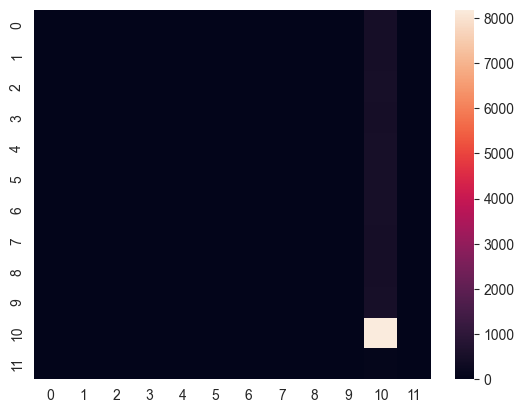

In [47]:
sns.heatmap(confusion_matrix(real, predictions))